[reference](https://towardsdatascience.com/crime-rate-prediction-using-facebook-prophet-5348e21273d)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/My Drive/data/country_vaccinations.csv")

In [4]:
df.shape

(29412, 15)

In [5]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [6]:
df.isnull().any()

country                                False
iso_code                               False
date                                   False
total_vaccinations                      True
people_vaccinated                       True
people_fully_vaccinated                 True
daily_vaccinations_raw                  True
daily_vaccinations                      True
total_vaccinations_per_hundred          True
people_vaccinated_per_hundred           True
people_fully_vaccinated_per_hundred     True
daily_vaccinations_per_million          True
vaccines                               False
source_name                            False
source_website                         False
dtype: bool

In [7]:
df.drop(['iso_code', 'daily_vaccinations_raw', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
              'daily_vaccinations_per_million','source_name','source_website'],
        axis = 1,
        inplace=True)

In [8]:
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,1367.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,1367.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."


In [9]:
newdf = df[df.country == "Thailand"]
newdf.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
26471,Thailand,2021-02-27,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26472,Thailand,2021-02-28,NaN,NaN,NaN,160.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26473,Thailand,2021-03-01,319.0,319.0,NaN,160.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26474,Thailand,2021-03-02,7262.0,7262.0,NaN,2421.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26475,Thailand,2021-03-03,NaN,NaN,NaN,2639.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"


In [10]:
newdf.dropna()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,vaccines
26496,Thailand,2021-03-24,102050.0,96188.0,5862.0,4383.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26502,Thailand,2021-03-30,180477.0,151413.0,29064.0,11830.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26504,Thailand,2021-04-01,204642.0,167235.0,37407.0,12789.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26505,Thailand,2021-04-02,231882.0,189666.0,42216.0,14813.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26506,Thailand,2021-04-03,244254.0,201864.0,42390.0,14713.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
...,...,...,...,...,...,...,...
26596,Thailand,2021-07-02,10572292.0,7640118.0,2932174.0,227259.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26597,Thailand,2021-07-03,10670897.0,7721150.0,2949747.0,230822.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26598,Thailand,2021-07-04,10777748.0,7804654.0,2973094.0,232891.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"
26599,Thailand,2021-07-05,11058390.0,8022029.0,3036361.0,234488.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac"


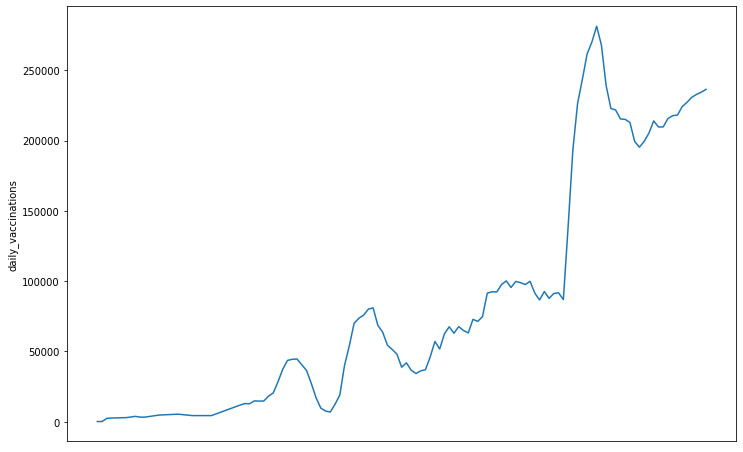

In [11]:
fig = plt.figure(figsize = (12, 8))
plt.plot(newdf['date'], newdf['daily_vaccinations'])
# plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('daily_vaccinations')
plt.gca().axes.get_xaxis().set_visible(False)

In [12]:
df_prophet = newdf[['date', 'daily_vaccinations']]
df_prophet = df_prophet.rename(columns = {'date': 'ds', 'daily_vaccinations': 'y'})

In [13]:
df_prophet.dropna()

,ds,y
26472,2021-02-28,160.0
26473,2021-03-01,160.0
26474,2021-03-02,2421.0
26475,2021-03-03,2639.0
26476,2021-03-04,2770.0
...,...,...
26596,2021-07-02,227259.0
26597,2021-07-03,230822.0
26598,2021-07-04,232891.0
26599,2021-07-05,234488.0


In [14]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-27,-18476.477191,-52926.403727,17883.604944,-18476.477191,-18476.477191,-175.372799,-175.372799,-175.372799,-175.372799,-175.372799,-175.372799,0.0,0.0,0.0,-18651.849990
1,2021-02-28,-17321.659262,-54145.555348,16507.517912,-17321.659262,-17321.659262,-586.145697,-586.145697,-586.145697,-586.145697,-586.145697,-586.145697,0.0,0.0,0.0,-17907.804958
2,2021-03-01,-16166.841332,-52845.163946,20793.454293,-16166.841332,-16166.841332,-493.929552,-493.929552,-493.929552,-493.929552,-493.929552,-493.929552,0.0,0.0,0.0,-16660.770884
3,2021-03-02,-15012.023402,-50053.233303,20449.521382,-15012.023402,-15012.023402,-437.716852,-437.716852,-437.716852,-437.716852,-437.716852,-437.716852,0.0,0.0,0.0,-15449.740254
4,2021-03-03,-13857.205472,-47839.064092,23720.149589,-13857.205472,-13857.205472,113.265260,113.265260,113.265260,113.265260,113.265260,113.265260,0.0,0.0,0.0,-13743.940212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2021-08-01,337748.572607,301044.310863,374731.164732,333468.867767,342900.237937,-586.145697,-586.145697,-586.145697,-586.145697,-586.145697,-586.145697,0.0,0.0,0.0,337162.426911
156,2021-08-02,341121.533737,307101.109048,378023.660645,336576.992733,346529.124375,-493.929552,-493.929552,-493.929552,-493.929552,-493.929552,-493.929552,0.0,0.0,0.0,340627.604185
157,2021-08-03,344494.494867,305734.870385,380098.720739,339644.567770,350216.966986,-437.716852,-437.716852,-437.716852,-437.716852,-437.716852,-437.716852,0.0,0.0,0.0,344056.778015
158,2021-08-04,347867.455997,309425.112731,388596.941863,342689.759292,353891.705181,113.265260,113.265260,113.265260,113.265260,113.265260,113.265260,0.0,0.0,0.0,347980.721257


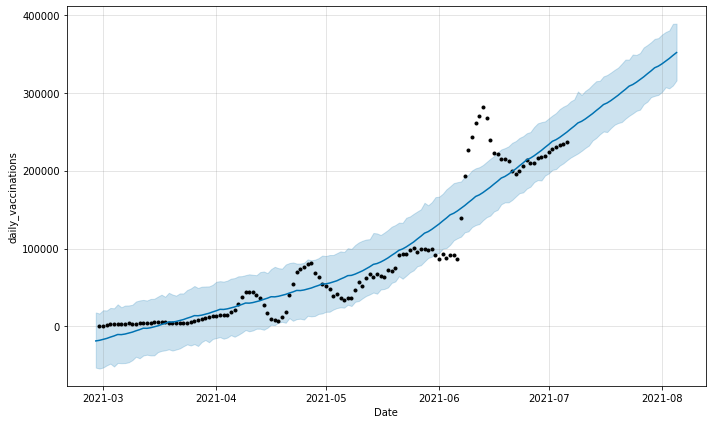

In [17]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'daily_vaccinations')

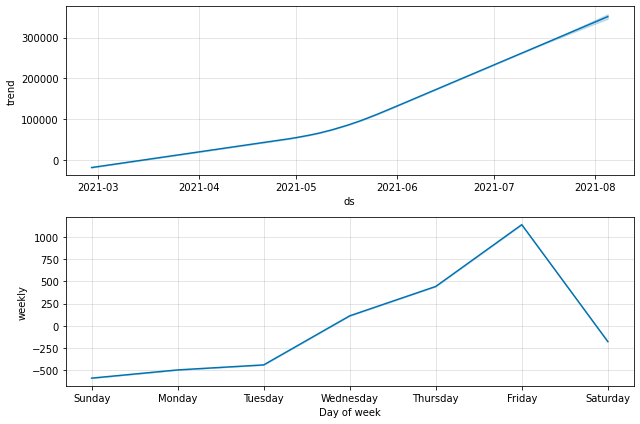

In [18]:
figure = m.plot_components(forecast)